# 1A.algo - filtre de Sobel - correction

Correction.

## Exercice 1 : application d'un filtre

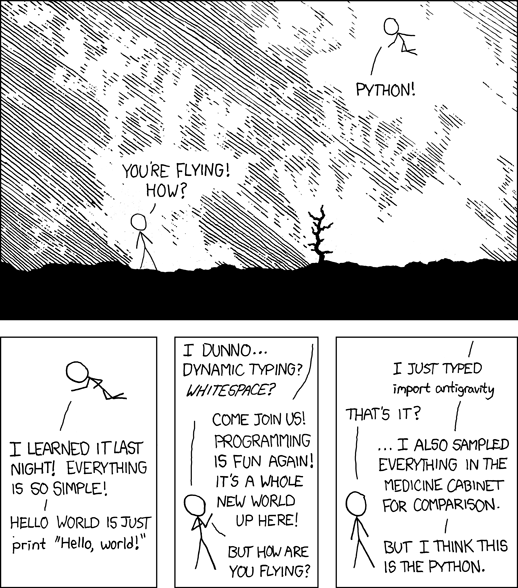

In [1]:
from pyquickhelper.loghelper import noLOG
from pyensae.datasource import download_data
f = download_data("python.png", url="http://imgs.xkcd.com/comics/")
from IPython.display import Image
Image("python.png")

Mais avant de pouvoir faire des calculs dessus, il faut pouvoir convertir l'image en un tableau ``numpy`` avec la fonction [numpy.asarray](http://docs.scipy.org/doc/numpy/reference/generated/numpy.asarray.html).

In [2]:
import PIL
import PIL.Image
im = PIL.Image.open("python.png")
from PIL.ImageDraw import Draw
import numpy
tab = numpy.asarray(im).copy()
tab.flags.writeable = True  # afin de pouvoir modifier l'image
"dimension",tab.shape, " type", type(tab[0,0])

('dimension', (588, 518), ' type', numpy.uint8)

Tout d'abord, nous allons utiliser la fonction [scipy.ndimage.filters.uniform_filter](http://scipy.org/) qui fait cela automatiquement.

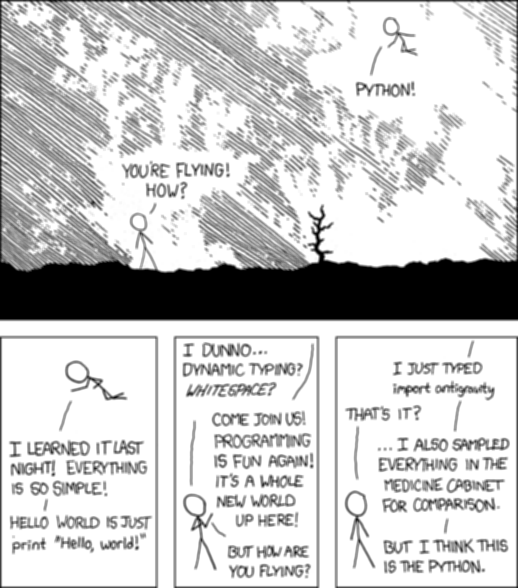

In [3]:
import scipy.ndimage.filters as filters
filtre = numpy.ones( (3,3) )
imgf   = filters.uniform_filter (tab, size=3)
imf = PIL.Image.fromarray(numpy.uint8(imgf))
imf.save("python_filtre.png")
Image("python_filtre.png")

Ensuite, voici une version s'appuyant sur le calcul matriciel. Lors du calcul du filtre, chaque pixel recevra 1/9 de la valeur du pixel placé juste avant sur la même ligne. C'est comme si on ajoutait à la matrice actuelle 8 fois la même matrice décalée d'un cran dans toutes les directions comme illustrée par la figure suivante.

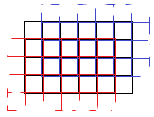

In [4]:
from pyquickhelper.helpgen import NbImage
NbImage("td11_cor_grid.png")

Il faudra traiter différements les pixels du bord qui ont moins de voisins (lui même inclus) que les autres ce que reflète la matrice suivante :

In [5]:
nbv = numpy.ones ( tab.shape ) * 9
lx,ly = tab.shape
nbv [:,0] = 6
nbv [0,:] = 6
nbv [ :, ly-1] =  6
nbv [ lx-1,:] = 6
nbv[0,0] = nbv[0,ly-1] = nbv[lx-1,0] = nbv[lx-1,ly-1] = 4
nbv [:4,:3]

array([[4., 6., 6.],
       [6., 9., 9.],
       [6., 9., 9.],
       [6., 9., 9.]])

Il ne reste plus qu'à programmer le flitre :

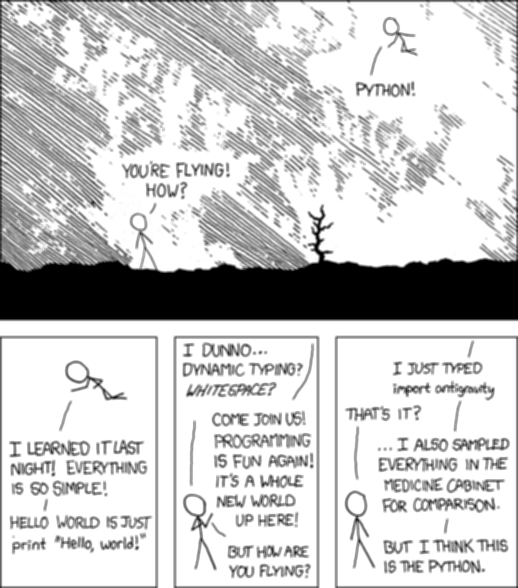

In [6]:
def filtre_sobel(image, filtre):

    nbv = numpy.ones ( image.shape ) * 9
    lx,ly = image.shape
    nbv [:,0] = 6
    nbv [0,:] = 6
    nbv [ :, ly-1] =  6
    nbv [ lx-1,:] = 6
    nbv[0,0] = nbv[0,ly-1] = nbv[lx-1,0] = nbv[lx-1,ly-1] = 4
    nbv [:4,:3]    
    
    res = numpy.zeros ( image.shape )
    for i in range(-1,2) :
        for j in range(-1,2) :
            coef = filtre [ i+1,j+1]
            mat = image [ max(i,0): min(lx+i,lx), max(j,0): min(ly+j,ly) ]
            mx,my = mat.shape
            i0,j0 = max(-i,0), max(-j,0)
            res [i0:i0+mx,j0:j0+my] += mat
    res /= nbv
    return res

res = filtre_sobel(tab, filtre)
im2 = PIL.Image.fromarray(numpy.uint8(res))
im2.save("python_filtre2.png")
Image("python_filtre2.png")

On programme maintenant la même fonction mais sans utiliser le calcul matriciel :

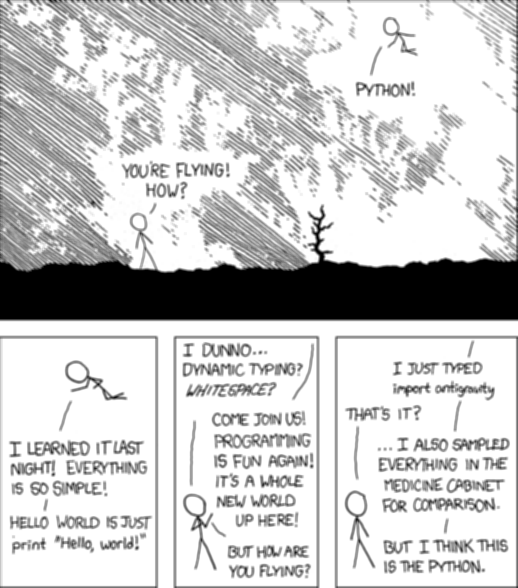

In [7]:
def filtre_sobel_python(image, filtre):
    res = numpy.zeros ( image.shape )
    for i in range(0, res.shape[0]):
        for j in range(0, res.shape[1]):
            nb = 0
            for k in range(-1,2) :
                for l in range(-1,2) :
                    if k+i > 0 and k+i < res.shape[0] and l+j > 0 and l+j < res.shape[1] :
                        res[i,j] += image[k+i, l+j]
                        nb += 1
            res[i,j] /= nb
    return res

res = filtre_sobel_python(tab, filtre)
im3 = PIL.Image.fromarray(numpy.uint8(res))
im3.save("python_filtre3.png")
Image("python_filtre3.png")

Il n'y pas vraiment besoin de mesurer le temps pour s'apercevoir que c'est beaucoup plus long.